In [1]:
!pip install librosa
!pip install tensorflow

In [2]:
import math, random
import pandas as pd
import numpy as np
import os
from os import listdir
import csv 
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [3]:
audio_data=pd.read_csv('merged_audio_path_file.csv')
audio_data

,Id,file_path,language
0,3666,D:/AudioFile/Malayalam/3666.mp3,Malayalam
1,12364,D:/AudioFile/Hindi/12364.mp3,Hindi
2,8940,D:/AudioFile/Malayalam/8940.mp3,Malayalam
3,3565,D:/AudioFile/Malayalam/3565.mp3,Malayalam
4,5273,D:/AudioFile/Malayalam/5273.mp3,Malayalam
...,...,...,...
49363,9267,D:/AudioFile/Hindi/9267.mp3,Hindi
49364,19314,D:/AudioFile/Malayalam/19314.mp3,Malayalam
49365,11587,D:/AudioFile/Malayalam/11587.mp3,Malayalam
49366,2911,D:/AudioFile/Malayalam/2911.mp3,Malayalam


In [4]:
audio_data.columns=['Id','Mp3Id','LanguageLabel']

In [5]:
audio_data

,Id,Mp3Id,LanguageLabel
0,3666,D:/AudioFile/Malayalam/3666.mp3,Malayalam
1,12364,D:/AudioFile/Hindi/12364.mp3,Hindi
2,8940,D:/AudioFile/Malayalam/8940.mp3,Malayalam
3,3565,D:/AudioFile/Malayalam/3565.mp3,Malayalam
4,5273,D:/AudioFile/Malayalam/5273.mp3,Malayalam
...,...,...,...
49363,9267,D:/AudioFile/Hindi/9267.mp3,Hindi
49364,19314,D:/AudioFile/Malayalam/19314.mp3,Malayalam
49365,11587,D:/AudioFile/Malayalam/11587.mp3,Malayalam
49366,2911,D:/AudioFile/Malayalam/2911.mp3,Malayalam


In [6]:
audio_data.drop(columns='Id',inplace=True)
audio_data

,Mp3Id,LanguageLabel
0,D:/AudioFile/Malayalam/3666.mp3,Malayalam
1,D:/AudioFile/Hindi/12364.mp3,Hindi
2,D:/AudioFile/Malayalam/8940.mp3,Malayalam
3,D:/AudioFile/Malayalam/3565.mp3,Malayalam
4,D:/AudioFile/Malayalam/5273.mp3,Malayalam
...,...,...
49363,D:/AudioFile/Hindi/9267.mp3,Hindi
49364,D:/AudioFile/Malayalam/19314.mp3,Malayalam
49365,D:/AudioFile/Malayalam/11587.mp3,Malayalam
49366,D:/AudioFile/Malayalam/2911.mp3,Malayalam


In [7]:
filepath = "D:/AudioFile/Hindi/5.mp3"
ipd.Audio(filepath)

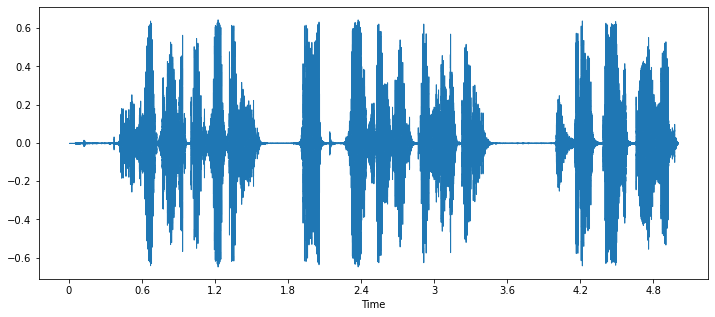

In [8]:
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [9]:
filepath = "D:/AudioFile/Malayalam/25702.mp3"
ipd.Audio(filepath)

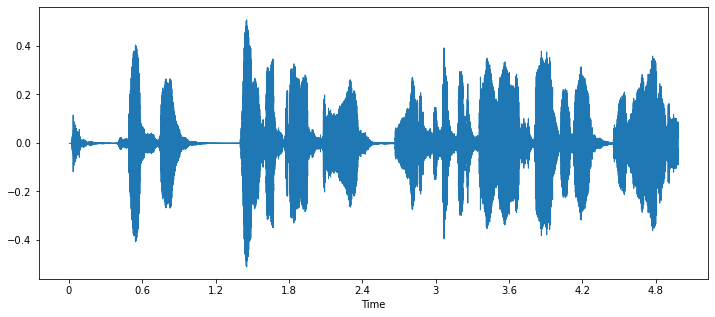

In [10]:
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

#### Imbalance data check

In [11]:
audio_data['LanguageLabel'].value_counts()

Hindi        25461
Malayalam    23907
Name: LanguageLabel, dtype: int64

C:\Users\amrut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


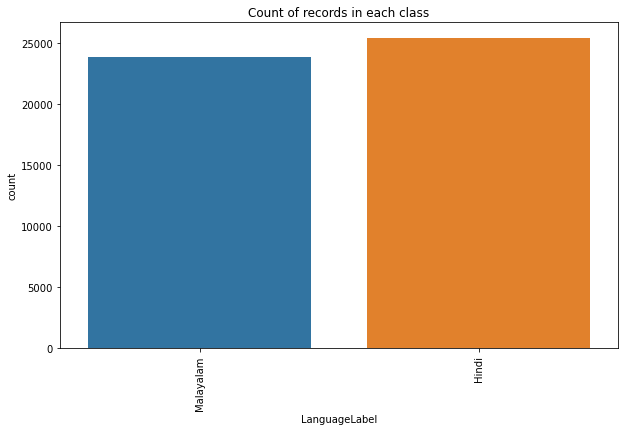

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(audio_data['LanguageLabel'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

### Data Processing

In [13]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 215)
[[-4.25107147e+02 -3.41969604e+02 -3.40910492e+02 ... -3.68025726e+02
  -3.80671692e+02 -3.35132690e+02]
 [ 1.61103943e+02  1.88209839e+02  1.78089874e+02 ...  1.87025711e+02
   1.82086700e+02  1.50411346e+02]
 [ 1.29095383e+01 -8.19566345e+00 -1.21998215e+01 ...  1.58818245e+01
   2.20827026e+01  3.76351433e+01]
 ...
 [-3.39711928e+00 -3.48265362e+00 -3.89797997e+00 ... -3.58770728e+00
  -6.35572529e+00 -2.99004436e-01]
 [-1.04966450e+01 -1.20032997e+01 -9.92652607e+00 ... -3.19243956e+00
  -5.38203573e+00 -5.43558884e+00]
 [-2.35261154e+00 -3.75375199e+00 -6.70558977e+00 ... -1.41370983e+01
  -1.59009266e+01 -1.32824421e+01]]


In [14]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [15]:
#Now we ned to extract the featured from all the audio files so we use tqdm
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(audio_data.iterrows()):
    
    file_name = row['Mp3Id']
#     print(index_num)
#     print(row)
#     print(file_name)
    final_class_labels=row["LanguageLabel"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1189it [03:46,  5.63it/s]C:\Users\amrut\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=361
  return f(*args, **kwargs)
2898it [09:08,  4.85it/s]C:\Users\amrut\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1065
  return f(*args, **kwargs)
49368it [2:12:06,  6.23it/s]


In [26]:
extracted_features

[[array([-3.4598956e+02,  1.1316274e+02, -5.2259040e+00,  1.6158922e+01,
         -4.4171915e+00,  7.3816361e+00, -1.5942769e+01, -1.6492052e+01,
         -1.6370926e+01, -1.8221069e+01, -1.2528202e+01, -9.4447556e+00,
         -1.2151172e+01, -3.7667457e-02, -1.0326218e+01, -1.0314084e+01,
         -8.7289333e+00, -1.2111675e+01, -7.6635528e+00, -7.6095161e+00,
         -6.1362252e+00,  2.8545382e+00, -4.7690010e+00,  6.2200232e+00,
          2.3985200e+00,  5.4805617e+00,  5.6450624e+00,  3.4884748e+00,
          3.1892986e+00,  2.9016085e+00,  1.3018569e+00, -1.6307126e+00,
         -9.8906702e-01, -3.5444882e+00, -2.4031267e+00, -2.1220634e+00,
         -2.1293573e+00, -5.7340431e-01, -4.4693127e-01, -2.3267992e+00],
        dtype=float32),
  'Malayalam'],
 [array([-3.2988943e+02,  8.0359245e+01,  8.1158152e+00,  9.6699038e+00,
         -1.1478879e+00,  6.1583257e-01, -2.2911654e+01, -1.1577553e+01,
         -1.5511524e+01, -5.5099521e+00, -1.2860906e+01,  7.5412712e+00,
         -

In [27]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','LanguageLabel'])
extracted_features_df.head()

,feature,LanguageLabel
0,"[-345.98956, 113.16274, -5.225904, 16.158922, ...",Malayalam
1,"[-329.88943, 80.359245, 8.115815, 9.669904, -1...",Hindi
2,"[-383.4224, 89.838554, -1.0061494, 9.033567, 6...",Malayalam
3,"[-456.5875, 102.45537, 26.125658, 27.268627, 2...",Malayalam
4,"[-362.23886, 146.10143, -31.01978, -6.089908, ...",Malayalam


In [28]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['LanguageLabel'].tolist())
### Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
### No of classes
num_labels=y.shape[1]

In [30]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [31]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [32]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1232/1235 [============================>.] - ETA: 0s - loss: 1.5051 - accuracy: 0.8185
Epoch 1: val_loss improved from inf to 0.02072, saving model to .\audio_classification.hdf5
1235/1235 [==============================] - 11s 7ms/step - loss: 1.5025 - accuracy: 0.8188 - val_loss: 0.0207 - val_accuracy: 0.9940
Epoch 2/100
1232/1235 [============================>.] - ETA: 0s - loss: 0.0617 - accuracy: 0.9828
Epoch 2: val_loss improved from 0.02072 to 0.01402, saving model to .\audio_classification.hdf5
1235/1235 [==============================] - 9s 7ms/step - loss: 0.0617 - accuracy: 0.9828 - val_loss: 0.0140 - val_accuracy: 0.9958
Epoch 3/100
1230/1235 [============================>.] - ETA: 0s - loss: 0.0332 - accuracy: 0.9924
Epoch 3: val_loss improved from 0.01402 to 0.00992, saving model to .\audio_classification.hdf5
1235/1235 [==============================] - 9s 7ms/step - loss: 0.0332 - accuracy: 0.9924 - val_loss: 0.0099 - val_accuracy: 0.9980
Epoch 4/100
1234/12

#### Check test accuracy

In [33]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9993923306465149


In [34]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

309/309 [==============================] - 1s 3ms/step
[0 1 1 ... 0 0 1]


In [40]:
filename="D:/AudioFile/Malayalam/19314.mp3"
#preprocess the audio file
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#predicted_label=model.predict_classes(mfccs_scaled_features)
x_predict=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(x_predict,axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

1/1 [==============================] - 0s 17ms/step
[1]
['Malayalam']


In [41]:
X_test

array([[-3.5245422e+02,  1.0309818e+02,  1.9264961e+01, ...,
         1.8560249e+00,  1.2441374e+00, -2.0513990e+00],
       [-3.2640335e+02,  7.9623398e+01,  3.6828861e-01, ...,
         3.7336680e-01,  2.9820869e+00,  3.1441560e+00],
       [-3.7381638e+02,  7.5520439e+01,  5.4668775e+00, ...,
        -1.2318220e+00, -8.9557993e-01,  1.3280563e+00],
       ...,
       [-4.1340613e+02,  6.8253586e+01, -8.9387999e+00, ...,
         2.5466638e+00,  1.6144528e+00,  1.7228154e+00],
       [-3.2158685e+02,  5.3735439e+01,  6.5977454e+00, ...,
         2.7465787e+00,  8.8446456e-01,  1.6724764e+00],
       [-3.3214426e+02,  8.6186852e+01,  6.0409623e-01, ...,
        -1.7380196e+00, -7.5153422e-01, -9.0634733e-01]], dtype=float32)

In [43]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [45]:
# filename="D:/AudioFile/Malayalam/19314.mp3"
# for 
# #preprocess the audio file
# # audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
# # mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
# # mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
# # #Reshape MFCC feature to 2-D array
# # mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# #predicted_label=model.predict_classes(mfccs_scaled_features)
# x_predict=model.predict(mfccs_scaled_features) 
# predicted_label=np.argmax(x_predict,axis=1)
# print(predicted_label)
# prediction_class = labelencoder.inverse_transform(predicted_label) 
# print(prediction_class)

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [50]:
from sklearn.metrics import confusion_matrix


# Create the confusion matrix
confusion_matrix = confusion_matrix(np.argmax(y_test,axis=1), classes_x)

print(confusion_matrix)

[[5015    0]
 [   6 4853]]


In [53]:
import sklearn.metrics

#Recall for Hindi
recall = sklearn.metrics.recall_score(np.argmax(y_test,axis=1), classes_x, pos_label=0)
print(recall)

1.0


In [54]:
#Recall For malayalam
recall = sklearn.metrics.recall_score(np.argmax(y_test,axis=1), classes_x, pos_label=1)
print(recall)

0.9987651780201687


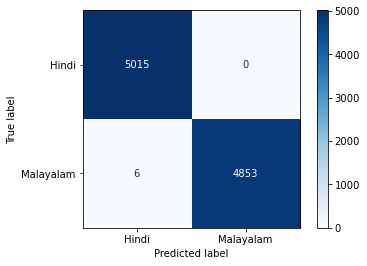

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Hindi","Malayalam"])

disp.plot(cmap=plt.cm.Blues)

In [59]:
#precision for Hindi
precision = sklearn.metrics.precision_score(np.argmax(y_test,axis=1), classes_x, pos_label=0)
print(precision)

0.9988050189205337


In [60]:
#precision for Malayalam
precision = sklearn.metrics.precision_score(np.argmax(y_test,axis=1), classes_x, pos_label=1)
print(precision)

1.0
